In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
palette = sns.palettes.SEABORN_PALETTES['colorblind']

## 1. Business Understanding

In this uncertain times, it is important for an investor/home buyer to take the best decisions in their home buying/selling processes.

In this project, we are going to answer several questions:

1. Do property prices go down?
2. Is the price of most expensive suburbs affected?
3. What factors are important in determining property price? How does the pandemic affect this?

## 2. Data Understanding

to answer our questions, we will need data of house prices from before the pandemic and during the pandemic.

### Data Gathering

Data for the period before the pandemic is taken from Kaggle, and data for house prices during the pandemic is scrapped from publicly available data from Domain weekly result (see project readme for sources)

In [30]:
df_2018 = pd.read_csv('./data/Melbourne_housing_FULL.csv')
df_2018.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [31]:
df_2020 = pd.read_csv('./data/2020-melbourne-data.csv')
df_2020.head()

,address,baths,beds,carparks,extracted_date,land_area,property_type,sold_date,sold_price,state,suburb,zip
0,702/6 Acacia Pl,1,1,1,07-03-2020,UNAVAILABLE,Unit,28th February 2020,$425k,VIC,Abbotsford,3067
1,104/10 Trenerry Cr,1,2,1,07-03-2020,UNAVAILABLE,Unit,2nd March 2020,$510k,VIC,Abbotsford,3067
2,56 Roberts Rd,1,2,1,07-03-2020,266m²,Unit,UNAVAILABLE,$630k,VIC,Airport West,3042
3,51 York St,2,3,2,07-03-2020,UNAVAILABLE,House,4th March 2020,Price withheld,VIC,Airport West,3042
4,2/92 Bowes Av,2,3,2,07-03-2020,UNAVAILABLE,Townhouse,26th February 2020,$810k,VIC,Airport West,3042


### Data Assessment

In [32]:
df_2018.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [33]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [34]:
df_2020.describe()

,address,baths,beds,carparks,extracted_date,land_area,property_type,sold_date,sold_price,state,suburb,zip
count,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883
unique,6063,8,13,17,5,1237,6,62,1426,2,728,421
top,6 Burke Rd,2,3,2,21-03-2020,UNAVAILABLE,House,UNAVAILABLE,Price withheld,VIC,Pakenham,UNAVAILABLE
freq,4,3493,2831,3298,1746,2872,4945,1465,557,6701,82,182


In [35]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 12 columns):
address           6883 non-null object
baths             6883 non-null object
beds              6883 non-null object
carparks          6883 non-null object
extracted_date    6883 non-null object
land_area         6883 non-null object
property_type     6883 non-null object
sold_date         6883 non-null object
sold_price        6883 non-null object
state             6883 non-null object
suburb            6883 non-null object
zip               6883 non-null object
dtypes: object(12)
memory usage: 645.4+ KB


In [36]:
df_clean[['Bathroom', 'Rooms', 'Car', 'Landsize', 'Type', 'Suburb']]

,Bathroom,Rooms,Car,Landsize,Type,Suburb
1,1.0,2,1.0,202.0,h,Abbotsford
2,1.0,2,0.0,156.0,h,Abbotsford
4,2.0,3,0.0,134.0,h,Abbotsford
5,2.0,3,1.0,94.0,h,Abbotsford
6,1.0,4,2.0,120.0,h,Abbotsford
10,1.0,2,0.0,181.0,h,Abbotsford
11,2.0,3,0.0,245.0,h,Abbotsford
14,1.0,2,2.0,256.0,h,Abbotsford
15,-1.0,3,-1.0,-1.0,h,Abbotsford
16,-1.0,2,-1.0,-1.0,t,Abbotsford


#### Data Quality Assessment:

1. Some rows in df_2018 have price missing, since this is the variable that we are interested in missing rows need to be removed
2. The columns in df_2018 and df_2020 are not the same, since we are going to compare these two datasets, unused columns in df_2018 will need to be dropped. For df_2018 we will use 'Bathroom', 'Rooms', 'Car', 'Landsize', 'Type', 'Suburb' and for df_2020 we will use 'baths', 'beds', 'carparks', 'land_area', 'property_type', 'suburb'
3. Bathroom, Car, Landsize have missing values
4. sold_price is in string, need to be converted to int
5. baths, beds, carparks and land_area contains non number as missing value. land_area also contain number with comma thousand separators
6. df_2020 contains duplicate rows


## 3. Data Preparation

### Data Cleaning

In [37]:
## remove duplicate listing
df_2020.drop_duplicates('address', inplace=True)

In [38]:
def convert_price_to_int(x):
    '''
    Extract price (e.g. $450k) and convert it into int (e.g 450000)
    
    Returns:
        price in integer
    '''
    num_multiplier = x[-1]
    cleaned_price = x[1:-1]
    try:
        cleaned_price = float(cleaned_price)
    except:
        print('error',x)
        return -1
    
    if num_multiplier == 'k':
        return cleaned_price * 1000
    elif num_multiplier == 'm':
        return cleaned_price * 1000000
    else:
        return -1

# convert sold_price to int
df_2020['sold_price'] = df_2020['sold_price'].apply(convert_price_to_int)

error Price withheld
error Price withheld
error -1
error $1.675m max bid
error Price withheld
error -1
error -1
error -1
error Price withheld
error $510k max bid
error $540k max bid
error $465k max bid
error Price withheld
error -1
error Price withheld
error Price withheld
error Price withheld
error Price withheld
error $655k max bid
error -1
error Price withheld
error Price withheld
error $880k max bid
error Price withheld
error Price withheld
error Price withheld
error -1
error Price withheld
error $1.15m max bid
error $920k max bid
error -1
error -1
error $280k max bid
error $460k max bid
error Price withheld
error -1
error Price withheld
error $1.025m max bid
error -1
error -1
error -1
error $1.5m max bid
error Price withheld
error $1.01m max bid
error -1
error Price withheld
error Price withheld
error Price withheld
error Price withheld
error -1
error Price withheld
error Price withheld
error $1.85m max bid
error -1
error -1
error $1m max bid
error Price withheld
error Price withh

In [39]:
# drop -1 price, -1 indicates price is missing in the scrapped ata
df_2020 = df_2020[df_2020['sold_price'] != -1]

In [40]:
def clean_land_area(x):
    '''
    Returns -1 when x is unavailable and other non numerical values
    Returns float(x) when x is numerical values
    '''
    if (x == 'UNAVAILABLE'):
        return -1
    else:
        try:
            return float(x[:-2].replace(',', ''))
        except:
            print(x)
            return -1

df_2020['land_area'] = df_2020['land_area'].apply(clean_land_area)

In [41]:
def clean_unavailable_text(x):
    '''
    Returns int(x) when x is a string integer and -1 otherwise
    '''
    try:
        return int(x)
    except:
        return -1
    
df_2020['baths'] = df_2020['baths'].apply(clean_unavailable_text) 
df_2020['beds'] = df_2020['beds'].apply(clean_unavailable_text)
df_2020['carparks'] = df_2020['carparks'].apply(clean_unavailable_text)

In [42]:
## clean all rows with null price

df_2018 = df_2018.dropna(axis=0, subset=['Price'])

In [43]:
for col in df_2018.columns:
    if (df_2018[col].dtype == np.object):
        continue
    df_2018[col].fillna(-1, inplace=True)

In [44]:
# extract only used columns
df_2018 = df_2018[['Bathroom', 'Rooms', 'Car', 'Landsize', 'Type', 'Suburb', 'Price']]
df_2020 = df_2020[['baths', 'beds', 'carparks', 'land_area', 'property_type', 'suburb', 'sold_price']]

In [45]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 7 columns):
Bathroom    27247 non-null float64
Rooms       27247 non-null int64
Car         27247 non-null float64
Landsize    27247 non-null float64
Type        27247 non-null object
Suburb      27247 non-null object
Price       27247 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [46]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5039 entries, 0 to 6882
Data columns (total 7 columns):
baths            5039 non-null int64
beds             5039 non-null int64
carparks         5039 non-null int64
land_area        5039 non-null float64
property_type    5039 non-null object
suburb           5039 non-null object
sold_price       5039 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 314.9+ KB


## 4. Modeling

### Data Visualization

to answer the first and second question we will use visualization

#### Do property prices go down?

In [47]:
print('2020 median price', df_2020['sold_price'].median())
print('2020 mean price', df_2020['sold_price'].mean())
print('2016-2018 median price', df_2018['Price'].median())
print('2016-2018 mean price', df_2018['Price'].mean())

2020 median price 632500.0
2020 mean price 739163.155784878
2016-2018 median price 870000.0
2016-2018 mean price 1050173.344955408


In [49]:
# create a dataframe containing the above data to make it easier in creating chart
prices_comparison = pd.DataFrame()
prices_comparison['Period'] = ['2020', '2016-2018']
prices_comparison['Mean'] = [df_2020['sold_price'].mean(), df_clean['Price'].mean()]
prices_comparison['Median'] = [df_2020['sold_price'].median(), df_clean['Price'].median()]

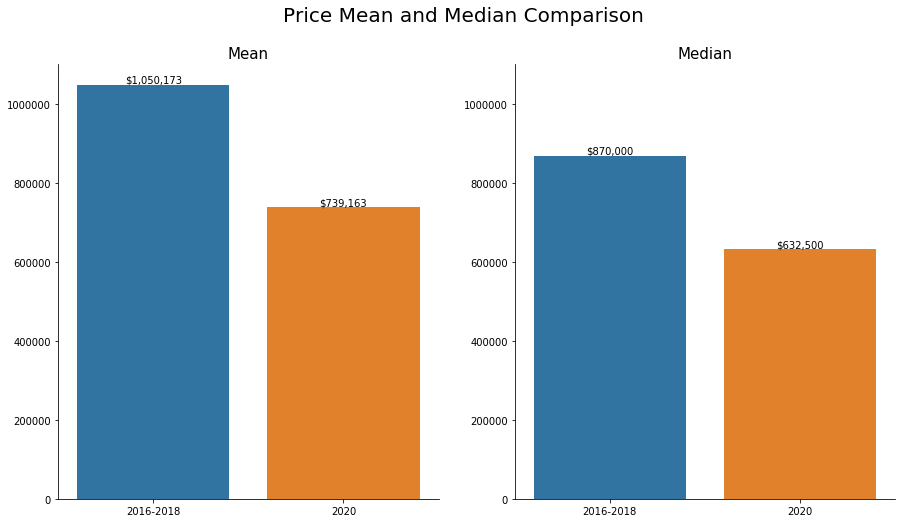

In [50]:
plt.figure(figsize=[15,8])

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = prices_comparison, x='Period', y='Mean', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Mean']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Mean']), ha='center')
plt.title('Mean', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.barplot(data = prices_comparison, x='Period', y='Median', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Median']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Median']), ha='center')
plt.ylim(ax1.get_ylim())
plt.title('Median', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.suptitle('Price Mean and Median Comparison', fontsize=20)
sns.despine();

There is evidence that sold price might fall during the pandemic, but it should be noted that a lot of auctions was withdrawn, so houses that got sold might be those whose owners need to sell immediately

#### Q2: Is the price of most expensive suburbs affected?

most expensive suburbs is defined as those suburbs whose median prices are in the top 15 in the 2016-2018 dataset

In [51]:
top_15_2020 = df_2020.groupby('suburb').median()['sold_price'].sort_values(ascending=False)[:15]
top_15_2018 = df_2018.groupby('Suburb').median()['Price'].sort_values(ascending=False)[:15]

In [52]:
top_15 = pd.DataFrame()
top_15['Suburb'] = ''
top_15['Median'] = 0
top_15['Period'] = ''

suburbs = top_15_2018.index

# insert rows for 2016-2018 median
for idx, median_price in enumerate(top_15_2018):
    temp = pd.DataFrame([[suburbs[idx], median_price, '2016-2018']], columns=['Suburb','Median','Period'])
    top_15 = pd.concat([temp, top_15], axis=0)
    
top_15.reset_index(inplace=True)
top_15.drop('index', axis=1, inplace=True)

In [53]:
# insert rows for 2020 median
for idx in top_15.index:
    suburb = top_15.loc[idx, 'Suburb'] 
    median_2020 = df_2020[df_2020['suburb'] == suburb].median()['sold_price']
    
    temp = pd.DataFrame([[suburbs[idx], median_2020, '2020']], columns=['Suburb','Median','Period'])
    top_15 = pd.concat([temp, top_15], axis=0)

top_15.reset_index(inplace=True)
top_15.drop('index', axis=1, inplace=True)

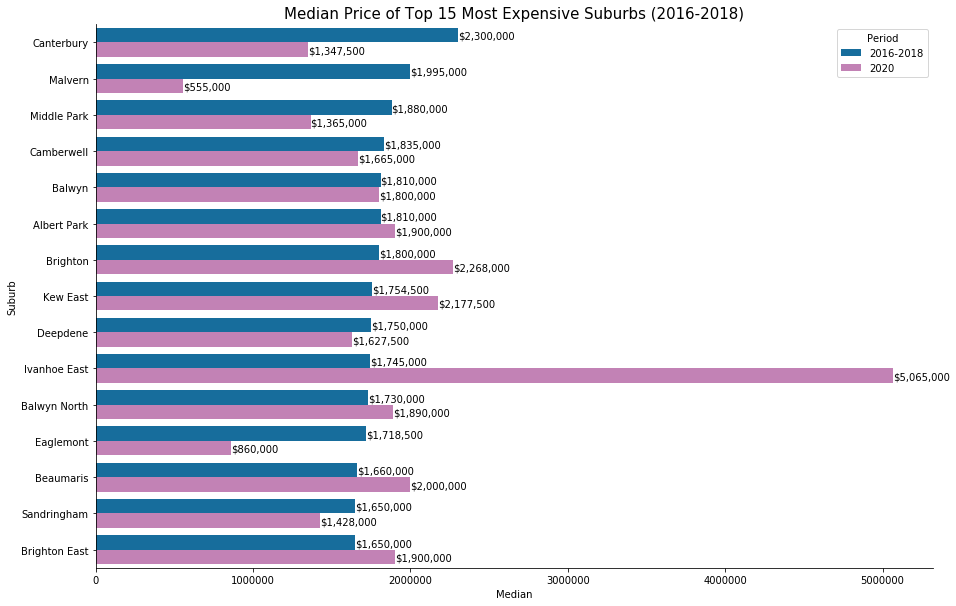

In [54]:
plt.figure(figsize=[15,10])
sns.barplot(data = top_15, y='Suburb', x='Median', hue='Period', order = suburbs, hue_order=['2016-2018', '2020'], palette=[palette[0], palette[4]])

for idx, suburb in enumerate(suburbs):
    data = top_15[top_15['Suburb'] == suburb]
    plt.text(data.iloc[1, 1], idx-0.1, '${:,.0f}'.format(data.iloc[1, 1]))
    plt.text(data.iloc[0, 1], idx+0.3, '${:,.0f}'.format(data.iloc[0, 1]))

sns.despine()
plt.title('Median Price of Top 15 Most Expensive Suburbs (2016-2018)', fontsize=15);

From the chart, we don't have evidence that the prices of these suburbs fall. But, keep in mind that data collected from 2020 is fewer in numbers, so it is most likely to be biased.

### Linear Model

To answer question 3 we will build a linear model with L1 regularization (Lasso) to get the variables with highest coeffiecients

In [55]:
def one_hot_cat_vars(df):
    '''
    One hot encode categorical variables, dropping the first column so it doesnt cause singularities problem
    
    Returns:
        original dataframe with categorical variables encoded
    '''
    
    cat_vars = df.select_dtypes(include=['object'])
    for col in cat_vars.columns:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep = '_', drop_first=1)], axis=1)
    
    return df

In [56]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, model='linear'):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = None
    if model == 'linear':
        lm_model = LinearRegression(normalize=True)
    if model == 'lasso':
        lm_model = Lasso(normalize=True)
    if model == 'ridge':
        lm_model = Ridge(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [57]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [58]:
def print_scores(y_test, y_pred):
    print('r2', r2_score(y_test, y_pred))
    print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('mae', mean_absolute_error(y_test, y_pred))

In [59]:
y_2018 = df_2018['Price']
y_2020 = df_2020['sold_price']

X_2018 = df_2018[['Bathroom', 'Rooms', 'Car', 'Landsize', 'Type', 'Suburb']]
X_2020 = df_2020[['baths', 'beds', 'carparks', 'land_area', 'property_type', 'suburb']]

In [60]:
X_2018 = one_hot_cat_vars(X_2018)
X_2020 = one_hot_cat_vars(X_2020)

In [62]:
# due to one-hot encoding, the number of variables created will be numerous, this might cause overfitting
# we will be using optimization, the lower the cutoff value means more variables will be used in the model
# cutoffs value means how many times must the variable occur in the data if we are to use this variable
cutoffs = [5000, 3500, 2500, 1000, 100, 30, 10, 5]

### Lasso model

we will be using Lasso as our model, Lasso is a linear model with L1 regularization. It is used because Lasso tends to shrink coefficient of less important variables to zero.

#### 2016-2018 data

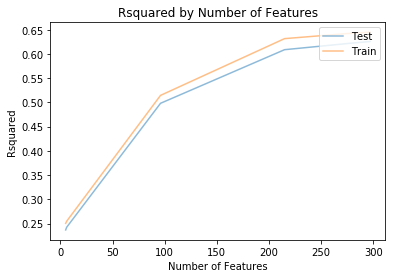

optimized num of variables 297
all variables 350
r2 0.625609370936127
rmse 392159.77846246003
mae 244717.21266750645


In [63]:
_, _, lm_model_linear_2018, X_train_linear_2018, X_test_linear_2018, y_train_linear_2018, y_test_linear_2018 = find_optimal_lm_mod(X_2018, y_2018, cutoffs, model='lasso')
print('optimized num of variables', X_train_linear_2018.shape[1])
print('all variables', X_2018.shape[1])
print_scores(y_test_linear_2018, lm_model_linear_2018.predict(X_test_linear_2018))

In [64]:
# see largest coef
coef_df = coef_weights(lm_model_linear_2018.coef_, X_train_linear_2018)

coef_df.head(20)

,est_int,coefs,abs_coefs
60,Suburb_Canterbury,1.303672e+06,1.303672e+06
193,Suburb_Middle Park,1.281664e+06,1.281664e+06
181,Suburb_Malvern,1.270171e+06,1.270171e+06
271,Suburb_Toorak,1.138012e+06,1.138012e+06
43,Suburb_Brighton,1.111904e+06,1.111904e+06
9,Suburb_Albert Park,1.072162e+06,1.072162e+06
108,Suburb_East Melbourne,1.064550e+06,1.064550e+06
25,Suburb_Balwyn,9.589268e+05,9.589268e+05
172,Suburb_Kooyong,9.562055e+05,9.562055e+05
164,Suburb_Kew,9.047887e+05,9.047887e+05


#### 2020 data

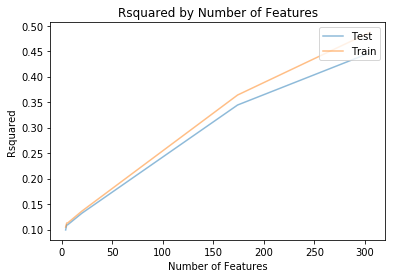

optimized num of variables 305
all variables 729
r2 0.44657252975489903
rmse 354295.8587634754
mae 194986.31129281045


In [65]:
_, _, lm_model_linear_2020, X_train_linear_2020, X_test_linear_2020, y_train_linear_2020, y_test_linear_2020 = find_optimal_lm_mod(X_2020, y_2020, cutoffs, model='lasso')
print('optimized num of variables', X_train_linear_2020.shape[1])
print('all variables', X_2020.shape[1])
print_scores(y_test_linear_2020, lm_model_linear_2020.predict(X_test_linear_2020))

In [66]:
# see largest coef
coef_df = coef_weights(lm_model_linear_2020.coef_, X_train_linear_2020)

coef_df.head(20)

,est_int,coefs,abs_coefs
160,suburb_Kew,1.367298e+06,1.367298e+06
201,suburb_Mount Eliza,1.055931e+06,1.055931e+06
270,suburb_Surrey Hills,1.043289e+06,1.043289e+06
35,suburb_Black Rock,9.825528e+05,9.825528e+05
47,suburb_Brighton,9.659577e+05,9.659577e+05
179,suburb_Malvern East,9.557071e+05,9.557071e+05
18,suburb_Aspendale,9.438645e+05,9.438645e+05
276,suburb_Templestowe,8.146875e+05,8.146875e+05
280,suburb_Toorak,7.896068e+05,7.896068e+05
22,suburb_Balwyn North,7.845345e+05,7.845345e+05


#### Q3: What factors are important in determining property price? How does the pandemic affect this?

From the above model, we could see that both the 2016-2018 and 2020 data have suburbs as their most important variables. 

The price of properties is mostly determined by the suburbs the properties are in. This is true for both before the pandemic and during the pandemic

## 5. Evaluation

As have been noted before, we will need more data for the prices during the pandemic as it is most likely to be biased, however, this is not be possible due to the data being unavailable yet.

According to Domain, there is a lot of auctions that was withdrawn during the lockdown period. Thus, the 2020 data might not be truly representative of the current value of the housing market.

As the 2020 data is scrapped without many preparations, the number of variables that could be obtained were limited. To truly determine what factors affecting the price, we would need to gather more variables so that a better can be built. The current model has an MAE of around $200k, which indicates that the model created wasn't able to accurately predict the price.